# Basic test for learning functionality

In [1]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.pardir, 'src')))
from layers import FullyConnected, Sigmoid, ReLU, Softmax
from losses import MSELoss, CrossEntropyLoss
from optimizers import SGD, Adam
from network import NeuralNetwork
from trainer import Trainer
from utils import one_hot

np.random.seed(0)

## Test if XOR function can be learned

In [2]:
# XOR test

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])
layers = [FullyConnected(2, 4), ReLU(), FullyConnected(4, 1), Sigmoid()]
net = NeuralNetwork(layers)

losses = []

# test different optimizers
optimizers = [Adam(lr=0.1), SGD(lr=0.1)]
for optimizer in optimizers:
    loss_fn = MSELoss()
    trainer = Trainer(net, optimizer, loss_fn)
    train_losses, val_losses = trainer.train(X, y, epochs=10000, batch_size=4)
    losses.append([train_losses,val_losses])
    y_pred = net.forward(X) > 0.5
    acc = np.mean(y_pred == y)
    print(optimizer)
    print(f"XOR test accuracy: {acc:.2f}")
    assert acc > 0.95, "Network failed to learn XOR"

Epoch 1: train loss=0.2392
Epoch 2: train loss=0.2459
Epoch 3: train loss=0.2298
Epoch 4: train loss=0.2133
Epoch 5: train loss=0.2050
Epoch 6: train loss=0.1895
Epoch 7: train loss=0.1673
Epoch 8: train loss=0.1488
Epoch 9: train loss=0.1325
Epoch 10: train loss=0.1160
Epoch 11: train loss=0.0975
Epoch 12: train loss=0.0840
Epoch 13: train loss=0.0717
Epoch 14: train loss=0.0594
Epoch 15: train loss=0.0479
Epoch 16: train loss=0.0398
Epoch 17: train loss=0.0335
Epoch 18: train loss=0.0274
Epoch 19: train loss=0.0228
Epoch 20: train loss=0.0190
Epoch 21: train loss=0.0158
Epoch 22: train loss=0.0133
Epoch 23: train loss=0.0111
Epoch 24: train loss=0.0093
Epoch 25: train loss=0.0080
Epoch 26: train loss=0.0067
Epoch 27: train loss=0.0056
Epoch 28: train loss=0.0049
Epoch 29: train loss=0.0041
Epoch 30: train loss=0.0035
Epoch 31: train loss=0.0031
Epoch 32: train loss=0.0027
Epoch 33: train loss=0.0023
Epoch 34: train loss=0.0021
Epoch 35: train loss=0.0018
Epoch 36: train loss=0.0016
E

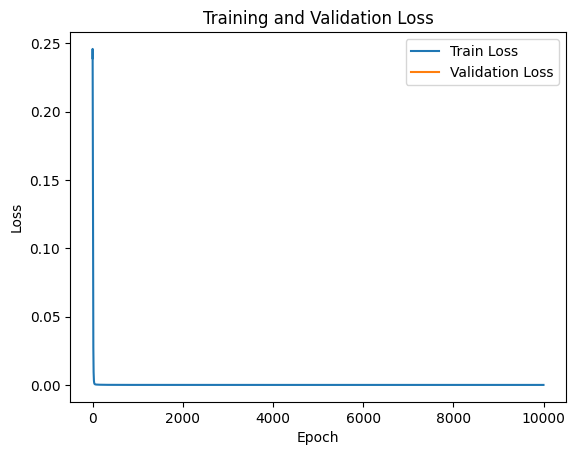

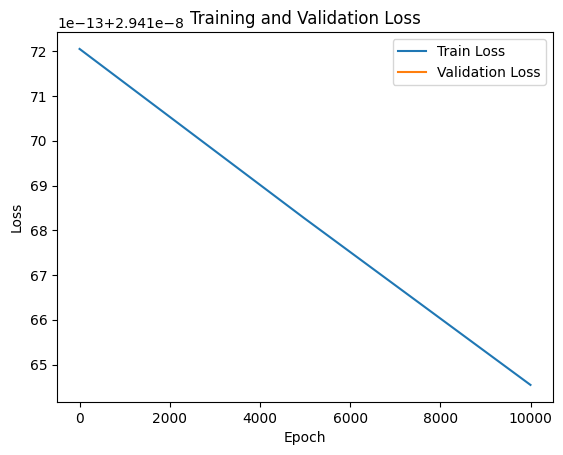

In [3]:
for [train_losses, val_losses] in losses:

    if train_losses is not None:
        plt.plot(train_losses, label='Train Loss')
    if val_losses is not None:
        plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

## Test if basic linear function can be learned

In [4]:
# linear regression test (y = 2x + 1)

X = np.linspace(-1, 1, 100).reshape(-1, 1)
y = 2 * X + 1
layers = [FullyConnected(1, 1)]
net = NeuralNetwork(layers)

losses = []

# test different optimizers
optimizers = [Adam(lr=0.1), SGD(lr=0.1)]
for optimizer in optimizers:
	loss_fn = MSELoss()
	trainer = Trainer(net, optimizer, loss_fn)
	train_losses, val_losses = trainer.train(X, y, epochs=200, batch_size=16)
	losses.append([train_losses,val_losses])
	y_pred = net.forward(X)
	mse = np.mean((y_pred - y) ** 2)
	print(optimizer)
	print(f"Linear test MSE: {mse:.4f}")
	assert mse < 0.02, "Network failed to learn linear mapping"

Epoch 1: train loss=2.6752
Epoch 2: train loss=1.1377
Epoch 3: train loss=0.6189
Epoch 4: train loss=0.3136
Epoch 5: train loss=0.0665
Epoch 6: train loss=0.0093
Epoch 7: train loss=0.0105
Epoch 8: train loss=0.0102
Epoch 9: train loss=0.0099
Epoch 10: train loss=0.0033
Epoch 11: train loss=0.0003
Epoch 12: train loss=0.0002
Epoch 13: train loss=0.0004
Epoch 14: train loss=0.0004
Epoch 15: train loss=0.0002
Epoch 16: train loss=0.0000
Epoch 17: train loss=0.0000
Epoch 18: train loss=0.0000
Epoch 19: train loss=0.0000
Epoch 20: train loss=0.0000
Epoch 21: train loss=0.0000
Epoch 22: train loss=0.0000
Epoch 23: train loss=0.0000
Epoch 24: train loss=0.0000
Epoch 25: train loss=0.0000
Epoch 26: train loss=0.0000
Epoch 27: train loss=0.0000
Epoch 28: train loss=0.0000
Epoch 29: train loss=0.0000
Epoch 30: train loss=0.0000
Epoch 31: train loss=0.0000
Epoch 32: train loss=0.0000
Epoch 33: train loss=0.0000
Epoch 34: train loss=0.0000
Epoch 35: train loss=0.0000
Epoch 36: train loss=0.0000
E

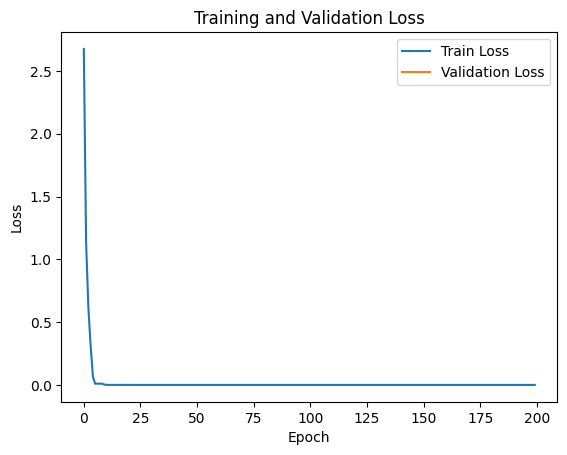

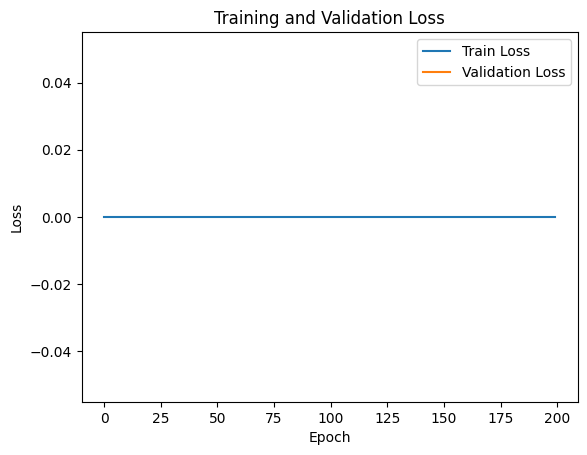

In [5]:
for [train_losses, val_losses] in losses:

    if train_losses is not None:
        plt.plot(train_losses, label='Train Loss')
    if val_losses is not None:
        plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

## Test if simple classification task can be learned

In [6]:
# Simple classification test: 3-class toy problem

# Create toy data: 3 classes, 2D
N = 100
X = np.vstack([
    np.random.randn(N, 2) + np.array([2, 0]),
    np.random.randn(N, 2) + np.array([-2, 0]),
    np.random.randn(N, 2) + np.array([0, 2])
])
y = np.array([0]*N + [1]*N + [2]*N)
y_oh = one_hot(y, num_classes=3)

losses = []

layers = [FullyConnected(2, 8), ReLU(), FullyConnected(8, 3), Softmax()]
net = NeuralNetwork(layers)
# test different optimizers
optimizers = [Adam(lr=0.1), SGD(lr=0.1)]
for optimizer in optimizers:
    loss_fn = CrossEntropyLoss()
    trainer = Trainer(net, optimizer, loss_fn)
    train_losses, val_losses = trainer.train(X, y_oh, epochs=1000, batch_size=16)
    losses.append([train_losses,val_losses])
    out = net.forward(X)
    preds = np.argmax(out, axis=1)
    acc = np.mean(preds == y)
    print(f"Toy classification accuracy: {acc:.2f}")
    assert acc > 0.90, "Network failed to learn toy classification problem"

Epoch 1: train loss=0.3849
Epoch 2: train loss=0.3337
Epoch 3: train loss=0.3209
Epoch 4: train loss=0.2785
Epoch 5: train loss=0.2974
Epoch 6: train loss=0.3215
Epoch 7: train loss=0.2792
Epoch 8: train loss=0.2574
Epoch 9: train loss=0.3195
Epoch 10: train loss=0.2822
Epoch 11: train loss=0.2617
Epoch 12: train loss=0.2623
Epoch 13: train loss=0.2548
Epoch 14: train loss=0.2918
Epoch 15: train loss=0.2531
Epoch 16: train loss=0.2633
Epoch 17: train loss=0.2638
Epoch 18: train loss=0.2886
Epoch 19: train loss=0.2615
Epoch 20: train loss=0.2548
Epoch 21: train loss=0.2414
Epoch 22: train loss=0.2369
Epoch 23: train loss=0.2571
Epoch 24: train loss=0.2580
Epoch 25: train loss=0.2513
Epoch 26: train loss=0.2467
Epoch 27: train loss=0.2458
Epoch 28: train loss=0.2489
Epoch 29: train loss=0.2388
Epoch 30: train loss=0.2639
Epoch 31: train loss=0.2970
Epoch 32: train loss=0.2348
Epoch 33: train loss=0.2893
Epoch 34: train loss=0.3003
Epoch 35: train loss=0.2549
Epoch 36: train loss=0.2775
E

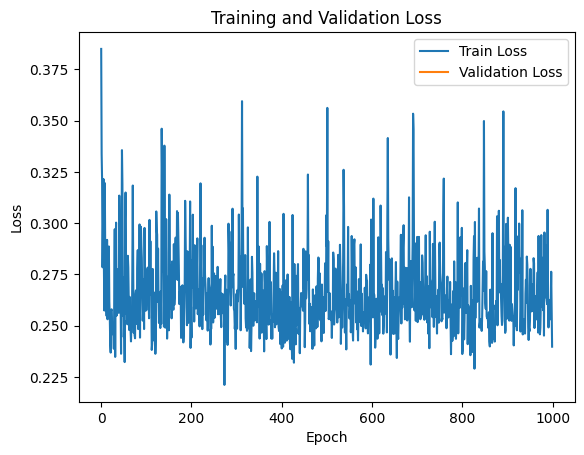

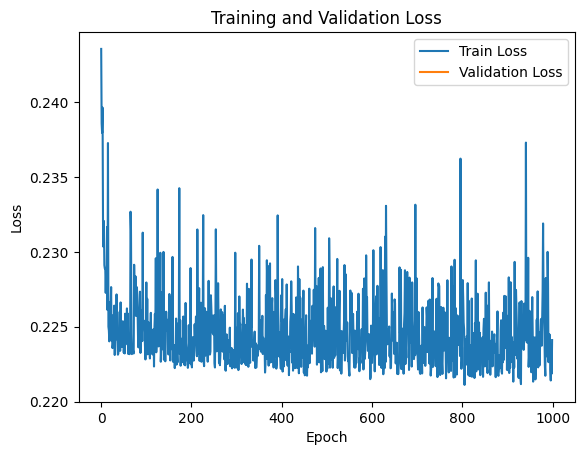

In [7]:
for [train_losses, val_losses] in losses:

    if train_losses is not None:
        plt.plot(train_losses, label='Train Loss')
    if val_losses is not None:
        plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()